In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,695 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and dire

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


random_seed = 42
seed_everything(random_seed) # Seed 고정
plt.rc('font', family='NanumGothicCoding')

In [4]:
train = pd.read_csv('/content/drive/MyDrive/웹 로그 기반 조회수 예측 해커톤/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/웹 로그 기반 조회수 예측 해커톤/data/test.csv')

In [5]:
train

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252284,SESSION_252284,USER_206021,1.0,Chrome,Android,mobile,1,1.0,0.0,1,0.0,0.0,Europe,Northern Europe,United Kingdom,youtube.com,referral,NaN,Category5_Path_0032
252285,SESSION_252285,USER_206022,1.0,Chrome,Macintosh,desktop,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
252286,SESSION_252286,USER_164240,5.0,Chrome,Macintosh,desktop,0,2.0,69.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
252287,SESSION_252287,USER_206023,1.0,Android Webview,Android,mobile,1,1.0,28.0,0,0.0,0.0,Africa,Northern Africa,Egypt,youtube.com,referral,NaN,Category2_Path_0018


In [6]:
train.isnull().sum()

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

In [7]:
train.dtypes

sessionID               object
userID                  object
TARGET                 float64
browser                 object
OS                      object
device                  object
new                      int64
quality                float64
duration               float64
bounced                  int64
transaction            float64
transaction_revenue    float64
continent               object
subcontinent            object
country                 object
traffic_source          object
traffic_medium          object
keyword                 object
referral_path           object
dtype: object

In [8]:
train.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


In [9]:
train.fillna('NAN', inplace=True)
test.fillna('NAN', inplace=True)

#### 범주형 데이터

In [10]:
train['new']=train['new'].replace({0:'not_visited',1:'visited'})
train['bounced']=train['bounced'].replace({0:'not_bounced',1:'bounced'})

Text(0.5, 1.0, '조회수 분포')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.can

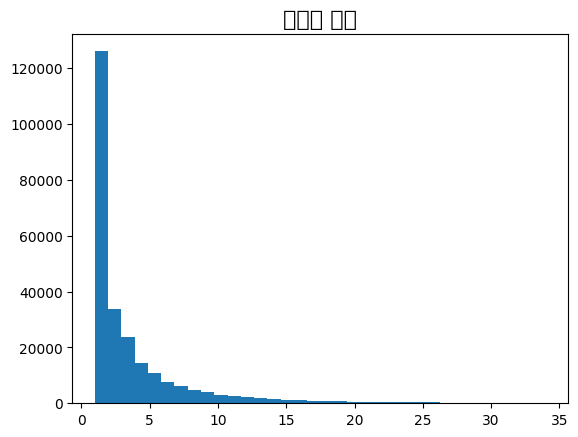

In [11]:
plt.hist(train[train['TARGET']<35]['TARGET'], bins=34)
plt.title('조회수 분포', fontsize=16)

Text(0.5, 1.0, '첫방문 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  f

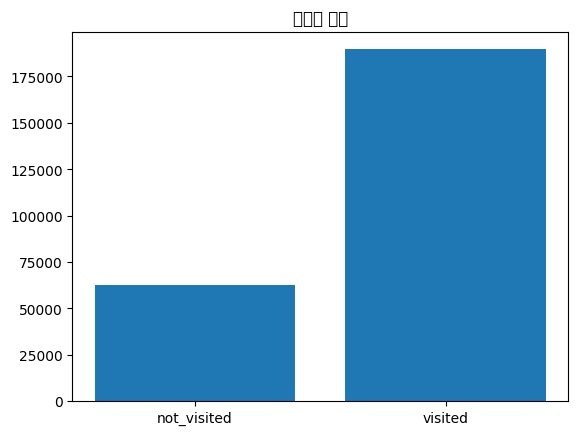

In [12]:
plt.bar(sorted(train['new'].unique()), train['new'].value_counts().sort_index())
plt.title('첫방문 비율')

Text(0.5, 1.0, '이탈 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from c

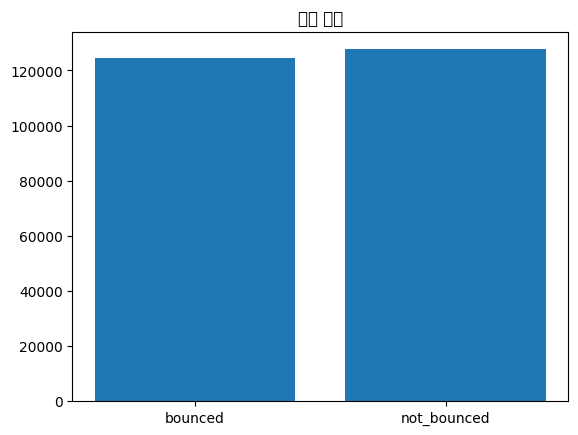

In [13]:
plt.bar(sorted(train['bounced'].unique()), train['bounced'].value_counts().sort_index())
plt.title('이탈 비율')

Text(0.5, 1.0, '대륙 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing 

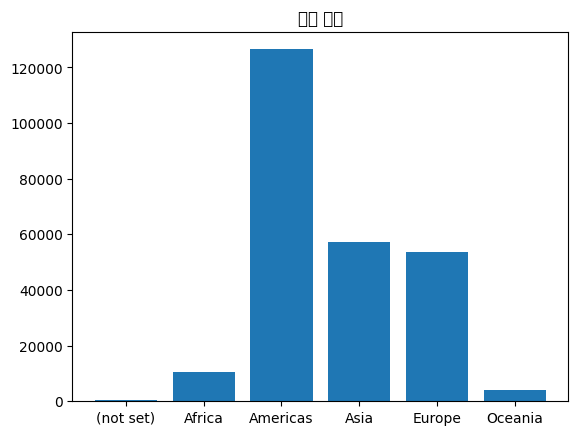

In [14]:
plt.bar(sorted(train['continent'].unique()), train['continent'].value_counts().sort_index())
plt.title('대륙 비율')

In [15]:
train['subcontinent'].value_counts()

Northern America      111945
Southern Asia          21744
Western Europe         18325
Northern Europe        15432
Southeast Asia         13977
Eastern Asia           13598
Southern Europe        10752
South America           9791
Eastern Europe          9239
Western Asia            7677
Northern Africa         5534
Central America         4201
Australasia             3895
Southern Africa         2164
Western Africa          1971
Eastern Africa           655
Caribbean                569
(not set)                336
Central Asia             258
Middle Africa            190
Micronesian Region        18
Melanesia                 10
Polynesia                  8
Name: subcontinent, dtype: int64

In [16]:
train['country'].value_counts()

United States               104201
India                        19300
United Kingdom               10019
Canada                        7735
Germany                       6319
                             ...  
St. Kitts & Nevis                1
Syria                            1
Bhutan                           1
Northern Mariana Islands         1
Vanuatu                          1
Name: country, Length: 205, dtype: int64

Text(0.5, 1.0, '기기 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

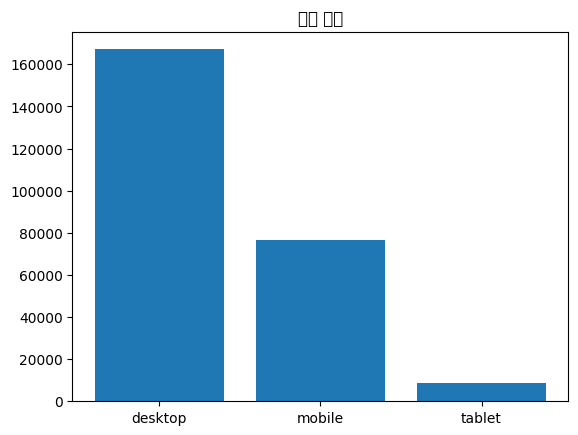

In [17]:
plt.bar(sorted(train['device'].unique()), train['device'].value_counts().sort_index())
plt.title('기기 비율')

In [18]:
train['OS'].value_counts()

Windows             88119
Macintosh           60316
Android             51870
iOS                 29778
Linux                9562
Chrome OS            9222
(not set)            2592
Tizen                 321
Samsung               259
Windows Phone         128
OS/2                   36
Xbox                   31
BlackBerry             29
Playstation Vita        9
Nintendo 3DS            6
Firefox OS              4
FreeBSD                 3
SunOS                   1
Nintendo WiiU           1
SymbianOS               1
Nokia                   1
Name: OS, dtype: int64

In [19]:
train['browser'].value_counts()

Chrome                                                  174395
Safari                                                   35689
Android Webview                                          13855
Firefox                                                   8436
Internet Explorer                                         4573
                                                         ...  
eosutpkiahjzvdgcwxlmyfqbrn                                   1
;__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;         1
wvsmagudcqeytijorlhxnfzkbp                                   1
efkaxnbyohqtspzlvcwrjmigdu                                   1
NokiaC7-00                                                   1
Name: browser, Length: 70, dtype: int64

In [20]:
train['keyword'].value_counts()

NAN                      137675
Category8                103584
Category9                  3488
Category11                 1931
Category10                 1147
                          ...  
Category2_Keyword_273         1
Category1_Keyword_271         1
Category3_Keyword_270         1
Category4_Keyword_269         1
Category4_Keyword_617         1
Name: keyword, Length: 624, dtype: int64

In [21]:
def keyword_trim(keyword):
  if pd.isna(keyword):
    return 'None'
  else:
    return keyword.split('_')[0]
train['trimmed_keyword']=train['keyword'].map(keyword_trim)

Text(0.5, 1.0, '키워드 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.ca

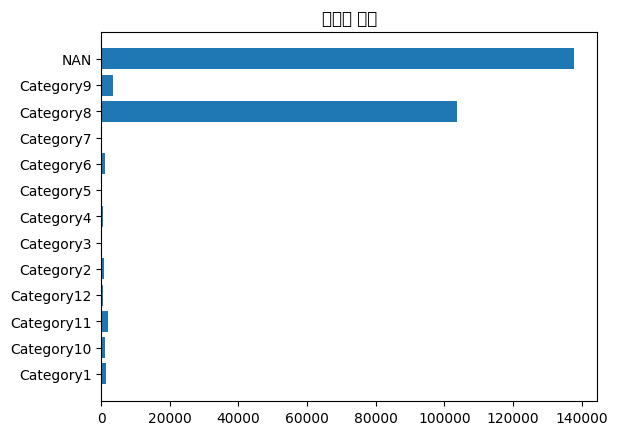

In [22]:
plt.barh(sorted(train['trimmed_keyword'].unique()), train['trimmed_keyword'].value_counts().sort_index())
plt.title('키워드 비율')

In [23]:
def referral_path_trim(referral_path):
  if pd.isna(referral_path):
    return 'None'
  else:
    return referral_path.split('_')[0]
train['trimmed_referral_path']=train['referral_path'].map(referral_path_trim)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

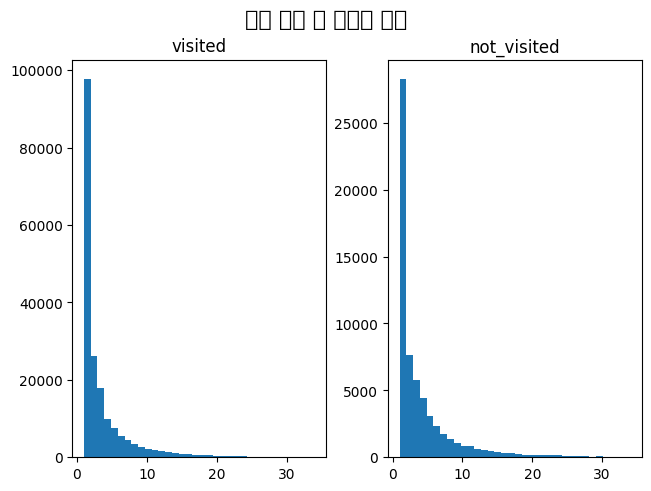

In [24]:
fig, axs = plt.subplots(1,2,constrained_layout=True)
fig.suptitle('방문 여부 별 조회수 분포', fontsize=16)

axs[0].hist(train[(train['TARGET']<35) & (train['new'] == 'visited')]['TARGET'], bins=34),
axs[0].set_title('visited', fontsize=12),
axs[1].hist(train[(train['TARGET']<35) & (train['new'] == 'not_visited')]['TARGET'], bins=34),
axs[1].set_title('not_visited', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


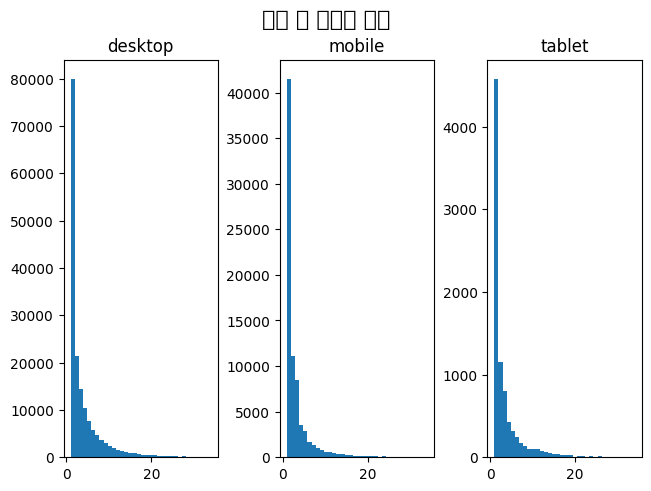

In [25]:
fig, axs = plt.subplots(1,3,constrained_layout=True)
fig.suptitle('기기 별 조회수 분포', fontsize=16)
for i, d in enumerate(sorted(train['device'].unique())):
  axs[i].hist(train[(train['TARGET']<35) & (train['device'] == d)]['TARGET'], bins=34),
  axs[i].set_title(d, fontsize=12),
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


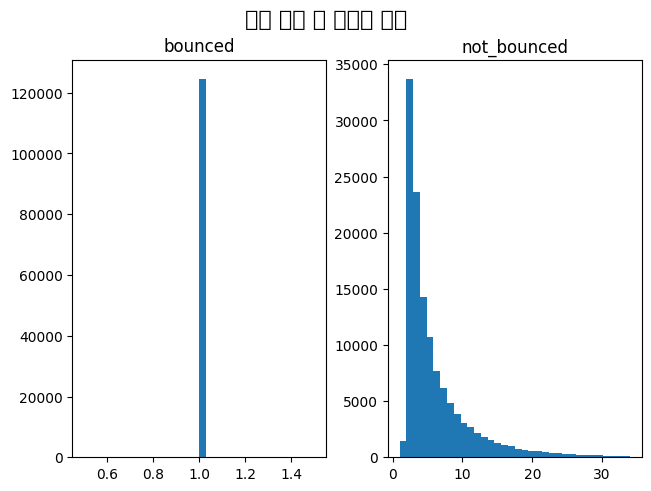

In [26]:
fig, axs = plt.subplots(1,2,constrained_layout=True)
fig.suptitle('이탈 여부 별 조회수 분포', fontsize=16)
for i, d in enumerate(sorted(train['bounced'].unique())):
  axs[i].hist(train[(train['TARGET']<35) & (train['bounced'] == d)]['TARGET'], bins=34),
  axs[i].set_title(d, fontsize=12),
plt.show()

## not_bounced 데이터 EDA

In [27]:
not_bounced_train = train[train['bounced'] == 'not_bounced'].drop('bounced',axis=1)

In [28]:
not_bounced_train

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path,trimmed_keyword,trimmed_referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,not_visited,45.0,839.0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NAN,Category8,NAN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,visited,1.0,39.0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NAN,Category8,NAN
7,SESSION_000007,USER_000007,5.0,Chrome,Macintosh,desktop,visited,1.0,64.0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NAN,Category8,NAN
8,SESSION_000008,USER_000008,5.0,Firefox,Linux,desktop,visited,1.0,60.0,0.0,0.0,Americas,South America,Brazil,youtube.com,referral,NAN,Category5_Path_0002,NAN,Category5
9,SESSION_000009,USER_000009,3.0,Chrome,Macintosh,desktop,visited,2.0,579.0,0.0,0.0,Americas,Northern America,United States,google,cpc,Category1_Keyword_000,NAN,Category1,NAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252281,SESSION_252281,USER_206018,6.0,Chrome,Macintosh,desktop,visited,1.0,99.0,0.0,0.0,Asia,Eastern Asia,Hong Kong,google,organic,Category8,NAN,Category8,NAN
252282,SESSION_252282,USER_206019,3.0,Chrome,Macintosh,desktop,visited,2.0,1423.0,0.0,0.0,Americas,Northern America,United States,google,organic,NAN,NAN,NAN,NAN
252286,SESSION_252286,USER_164240,5.0,Chrome,Macintosh,desktop,not_visited,2.0,69.0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NAN,Category1,NAN,Category1
252287,SESSION_252287,USER_206023,1.0,Android Webview,Android,mobile,visited,1.0,28.0,0.0,0.0,Africa,Northern Africa,Egypt,youtube.com,referral,NAN,Category2_Path_0018,NAN,Category2


In [29]:
not_bounced_train.describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,127741.000000,127741.000000,127741.000000,127741.000000,1.277410e+05
mean,6.120447,6.548681,223.381365,0.017841,1.789600e+06
std,6.856110,15.093452,437.707833,0.141298,2.987505e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,29.000000,0.000000,0.000000e+00
50%,4.000000,1.000000,70.000000,0.000000,0.000000e+00
75%,7.000000,3.000000,200.000000,0.000000,0.000000e+00
max,386.000000,98.000000,11186.000000,12.000000,3.325712e+09


In [30]:
not_bounced_train.corr(method='pearson')

<ipython-input-30-90e2eee86492>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train.corr(method='pearson')


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.602723,0.526083,0.318626,0.182148
quality,0.602723,1.000000,0.411593,0.470061,0.243841
duration,0.526083,0.411593,1.000000,0.193630,0.115890
transaction,0.318626,0.470061,0.193630,1.000000,0.460531
transaction_revenue,0.182148,0.243841,0.115890,0.460531,1.000000


In [31]:
not_bounced_train['transaction'].value_counts()

0.0     125533
1.0       2162
2.0         38
3.0          3
4.0          2
5.0          1
7.0          1
12.0         1
Name: transaction, dtype: int64

In [32]:
not_bounced_train['transaction_revenue'].value_counts()

0.0            125539
43405120.0         31
46237120.0         27
40573120.0         26
42461120.0         25
                ...  
216478080.0         1
165181120.0         1
90350240.0          1
68770400.0          1
461559360.0         1
Name: transaction_revenue, Length: 1218, dtype: int64

In [33]:
not_bounced_train[not_bounced_train['transaction']==0].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,125533.000000,125533.000000,125533.000000,125533.0,125533.0
mean,5.844447,5.567835,212.427911,0.0,0.0
std,6.336630,12.944128,421.261504,0.0,0.0
min,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,1.000000,28.000000,0.0,0.0
50%,4.000000,1.000000,68.000000,0.0,0.0
75%,7.000000,3.000000,188.000000,0.0,0.0
max,386.000000,97.000000,11186.000000,0.0,0.0


In [34]:
not_bounced_train[not_bounced_train['transaction']!=0].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,2208.000000,2208.000000,2208.000000,2208.000000,2.208000e+03
mean,21.812047,62.313406,846.125906,1.032156,1.035350e+08
std,13.644376,22.129506,774.847090,0.328882,2.027795e+08
min,3.000000,2.000000,78.000000,1.000000,0.000000e+00
25%,13.000000,48.000000,349.000000,1.000000,2.736656e+07
50%,18.000000,67.000000,586.500000,1.000000,4.775696e+07
75%,26.000000,80.000000,1066.250000,1.000000,8.930712e+07
max,171.000000,98.000000,7681.000000,12.000000,3.325712e+09


In [35]:
not_bounced_train[not_bounced_train['transaction']==0].corr(method='pearson')

<ipython-input-35-497ce7aa4efd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['transaction']==0].corr(method='pearson')


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.568831,0.494229,NaN,NaN
quality,0.568831,1.000000,0.381802,NaN,NaN
duration,0.494229,0.381802,1.000000,NaN,NaN
transaction,NaN,NaN,NaN,NaN,NaN
transaction_revenue,NaN,NaN,NaN,NaN,NaN


In [36]:
not_bounced_train[not_bounced_train['transaction']!=0].corr(method='pearson')

<ipython-input-36-15439543a1ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['transaction']!=0].corr(method='pearson')


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.216564,0.604400,0.370402,0.193019
quality,0.216564,1.000000,0.210811,0.060373,0.130978
duration,0.604400,0.210811,1.000000,0.196495,0.147703
transaction,0.370402,0.060373,0.196495,1.000000,0.111780
transaction_revenue,0.193019,0.130978,0.147703,0.111780,1.000000


In [37]:
def get_transaction_status(transaction):
  return 'N' if transaction == 0 else 'Y'
not_bounced_train['transaction_status'] = not_bounced_train['transaction'].map(get_transaction_status)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

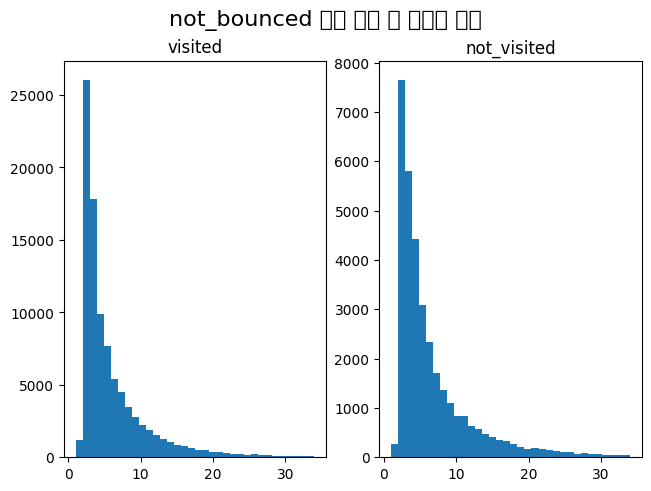

In [38]:
fig, axs = plt.subplots(1,2,constrained_layout=True)
fig.suptitle('not_bounced 방문 여부 별 조회수 분포', fontsize=16)

axs[0].hist(not_bounced_train[(not_bounced_train['TARGET']<35) & (not_bounced_train['new'] == 'visited')]['TARGET'], bins=34),
axs[0].set_title('visited', fontsize=12),
axs[1].hist(not_bounced_train[(not_bounced_train['TARGET']<35) & (not_bounced_train['new'] == 'not_visited')]['TARGET'], bins=34),
axs[1].set_title('not_visited', fontsize=12)
plt.show()

Text(0.5, 1.0, 'not_bounced 기기 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

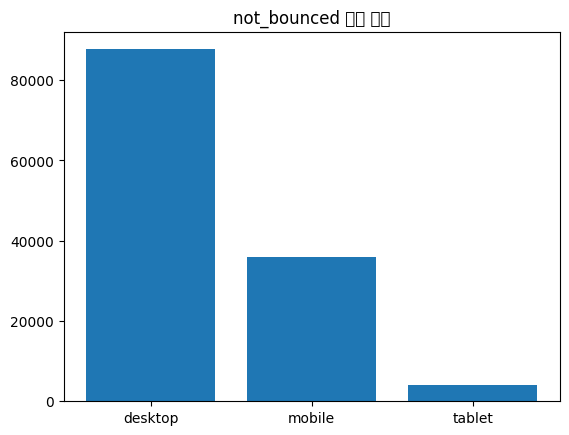

In [39]:
plt.bar(sorted(not_bounced_train['device'].unique()), not_bounced_train['device'].value_counts().sort_index())
plt.title('not_bounced 기기 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

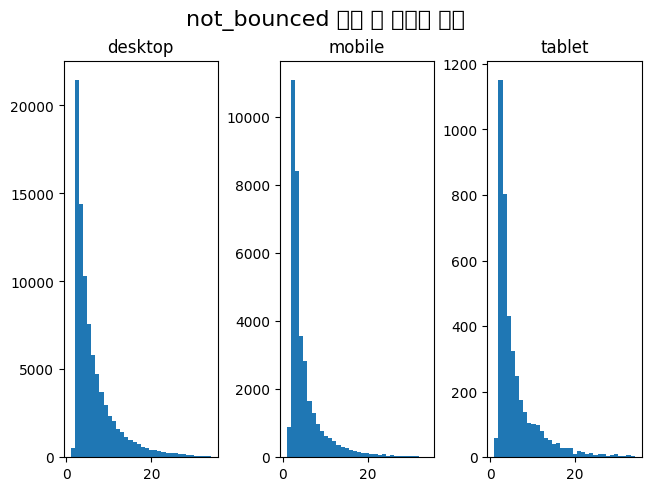

In [40]:
fig, axs = plt.subplots(1,3,constrained_layout=True)
fig.suptitle('not_bounced 기기 별 조회수 분포', fontsize=16)
for i, d in enumerate(sorted(not_bounced_train['device'].unique())):
  axs[i].hist(not_bounced_train[(not_bounced_train['TARGET']<35) & (not_bounced_train['device'] == d)]['TARGET'], bins=34),
  axs[i].set_title(d, fontsize=12),
plt.show()

In [41]:
not_bounced_train[not_bounced_train['device'] == 'desktop'].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,87705.000000,87705.000000,87705.000000,87705.000000,8.770500e+04
mean,6.487076,8.277476,243.423545,0.023853,2.494424e+06
std,7.038057,17.382806,472.323387,0.163764,3.583399e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,28.000000,0.000000,0.000000e+00
50%,4.000000,1.000000,74.000000,0.000000,0.000000e+00
75%,8.000000,4.000000,220.000000,0.000000,0.000000e+00
max,386.000000,98.000000,11186.000000,12.000000,3.325712e+09


In [42]:
not_bounced_train[not_bounced_train['device'] == 'mobile'].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,35857.000000,35857.000000,35857.000000,35857.000000,3.585700e+04
mean,5.201802,2.703740,177.574002,0.004685,2.443961e+05
std,6.167367,6.534542,344.697266,0.068697,5.670679e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,29.000000,0.000000,0.000000e+00
50%,3.000000,1.000000,61.000000,0.000000,0.000000e+00
75%,6.000000,1.000000,163.000000,0.000000,0.000000e+00
max,270.000000,85.000000,6369.000000,2.000000,4.765029e+08


In [43]:
not_bounced_train[not_bounced_train['device'] == 'tablet'].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,4179.000000,4179.000000,4179.000000,4179.000000,4.179000e+03
mean,6.308208,3.256999,195.794688,0.004547,2.556887e+05
std,7.800085,7.441651,357.413174,0.067283,4.886344e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,28.000000,0.000000,0.000000e+00
50%,4.000000,1.000000,69.000000,0.000000,0.000000e+00
75%,7.000000,2.000000,188.000000,0.000000,0.000000e+00
max,125.000000,94.000000,4583.000000,1.000000,1.916131e+08


In [44]:
not_bounced_train[not_bounced_train['device'] == 'desktop'].corr(method='pearson')

<ipython-input-44-ea01371d313c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['device'] == 'desktop'].corr(method='pearson')


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.629635,0.536641,0.345459,0.201387
quality,0.629635,1.000000,0.409547,0.474498,0.243878
duration,0.536641,0.409547,1.000000,0.194607,0.121089
transaction,0.345459,0.474498,0.194607,1.000000,0.461070
transaction_revenue,0.201387,0.243878,0.121089,0.461070,1.000000


In [45]:
not_bounced_train[not_bounced_train['device'] == 'mobile'].corr(method='pearson')

<ipython-input-45-9f31c675ea8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['device'] == 'mobile'].corr(method='pearson')


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.615503,0.487815,0.221579,0.161722
quality,0.615503,1.000000,0.461191,0.371325,0.255273
duration,0.487815,0.461191,1.000000,0.179291,0.117412
transaction,0.221579,0.371325,0.179291,1.000000,0.628570
transaction_revenue,0.161722,0.255273,0.117412,0.628570,1.000000


In [46]:
not_bounced_train[not_bounced_train['device'] == 'tablet'].corr(method='pearson')

<ipython-input-46-c24d8d2a3b33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['device'] == 'tablet'].corr(method='pearson')


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.587009,0.506362,0.239957,0.227085
quality,0.587009,1.000000,0.491740,0.338026,0.276034
duration,0.506362,0.491740,1.000000,0.235131,0.226584
transaction,0.239957,0.338026,0.235131,1.000000,0.774371
transaction_revenue,0.227085,0.276034,0.226584,0.774371,1.000000


Text(0.5, 1.0, 'not_bounced 대륙 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing 

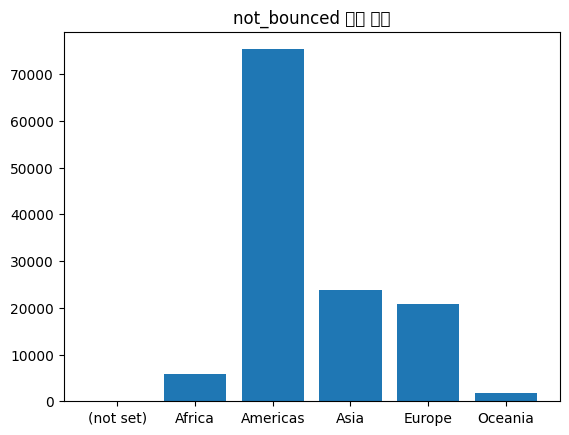

In [47]:
plt.bar(sorted(not_bounced_train['continent'].unique()), not_bounced_train['continent'].value_counts().sort_index())
plt.title('not_bounced 대륙 비율')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

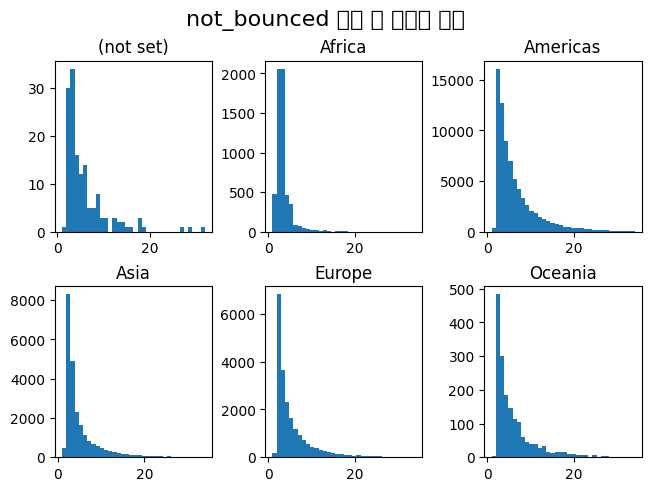

In [48]:
fig, axs = plt.subplots(2,3,constrained_layout=True)
fig.suptitle('not_bounced 대륙 별 조회수 분포', fontsize=16)
for i, d in enumerate(sorted(not_bounced_train['continent'].unique())):
  axs[i//3][i%3].hist(not_bounced_train[(not_bounced_train['TARGET']<35) & (not_bounced_train['continent'] == d)]['TARGET'], bins=34),
  axs[i//3][i%3].set_title(d, fontsize=12),
plt.show()

In [49]:
not_bounced_train['traffic_medium'].value_counts()

organic      55247
(none)       35686
referral     30738
cpc           3416
affiliate     2477
cpm            174
(not set)        3
Name: traffic_medium, dtype: int64

In [50]:
def edit_traffic_medimum(data):
  if data['traffic_medium'] != 'referral' and data['referral_path'] != 'NAN':
    data['traffic_medium'] = 'referral'
  if data['traffic_medium'] == '(not set)':
    data['traffic_medium'] = '(none)'
  return data
not_bounced_train=not_bounced_train.apply(edit_traffic_medimum, axis=1)

In [51]:
def traffic_source_integrate(traffic_source):
  keywords = ['google','youtube','(direct)']
  for keyword in keywords:
    if keyword in traffic_source:
      return keyword
  return 'etc'
not_bounced_train['integrated_traffic_source']=not_bounced_train['traffic_source'].map(traffic_source_integrate)

In [52]:
not_bounced_train['subcontinent'].value_counts()

Northern America      69475
Southern Asia          9587
Western Europe         7197
Northern Europe        5877
Eastern Asia           5486
Southeast Asia         5375
Southern Europe        4135
South America          4021
Eastern Europe         3624
Western Asia           3359
Northern Africa        3144
Australasia            1716
Central America        1575
Southern Africa        1408
Western Africa          950
Eastern Africa          258
Caribbean               230
(not set)               148
Central Asia             86
Middle Africa            72
Micronesian Region       11
Melanesia                 4
Polynesia                 3
Name: subcontinent, dtype: int64

In [53]:
not_bounced_train['trimmed_keyword'].unique()

array(['Category8', 'NAN', 'Category1', 'Category10', 'Category6',
       'Category9', 'Category2', 'Category11', 'Category3', 'Category4',
       'Category5', 'Category12', 'Category7'], dtype=object)

In [54]:
def keyword_referral_path_integrate(data):
  data['keyword_or_referral_path'] = 'NAN'
  if data['trimmed_keyword'] != 'NAN':
    data['keyword_or_referral_path'] = data['trimmed_keyword']
  if data['trimmed_referral_path'] != 'NAN':
    data['keyword_or_referral_path'] = data['trimmed_referral_path']
  return data
not_bounced_train=not_bounced_train.apply(keyword_referral_path_integrate, axis=1)

In [55]:
not_bounced_train[(not_bounced_train['keyword']=='NAN') & (not_bounced_train['referral_path']=='NAN')]['traffic_medium'].value_counts()

(none)       18277
affiliate     2477
organic       1310
cpm            174
cpc             11
Name: traffic_medium, dtype: int64

In [56]:
not_bounced_train['traffic_medium'].value_counts()

organic      55247
referral     48150
(none)       18277
cpc           3416
affiliate     2477
cpm            174
Name: traffic_medium, dtype: int64

In [57]:
not_bounced_train[not_bounced_train['keyword']!='NAN']['traffic_medium'].value_counts()

organic    53937
cpc         3405
Name: traffic_medium, dtype: int64

In [58]:
not_bounced_train['integrated_traffic_source'].value_counts()

google      65227
(direct)    35686
youtube     21590
etc          5238
Name: integrated_traffic_source, dtype: int64

In [59]:
not_bounced_train[not_bounced_train['integrated_traffic_source']=='google'].corr()

<ipython-input-59-3f23585d1ebf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['integrated_traffic_source']=='google'].corr()


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.624532,0.523156,0.282175,0.147233
quality,0.624532,1.000000,0.406064,0.420135,0.214818
duration,0.523156,0.406064,1.000000,0.163789,0.096673
transaction,0.282175,0.420135,0.163789,1.000000,0.420035
transaction_revenue,0.147233,0.214818,0.096673,0.420035,1.000000


In [60]:
not_bounced_train[not_bounced_train['integrated_traffic_source']=='(direct)'].corr()

<ipython-input-60-0e4116cd7da5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['integrated_traffic_source']=='(direct)'].corr()


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.665819,0.536693,0.395203,0.242937
quality,0.665819,1.000000,0.471508,0.484643,0.266207
duration,0.536693,0.471508,1.000000,0.247544,0.151275
transaction,0.395203,0.484643,0.247544,1.000000,0.496517
transaction_revenue,0.242937,0.266207,0.151275,0.496517,1.000000


In [61]:
not_bounced_train[not_bounced_train['integrated_traffic_source']=='youtube'].corr()

<ipython-input-61-4d00b24e339d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['integrated_traffic_source']=='youtube'].corr()


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.437671,0.459490,0.068851,0.068851
quality,0.437671,1.000000,0.394860,0.155629,0.155629
duration,0.459490,0.394860,1.000000,0.107334,0.107334
transaction,0.068851,0.155629,0.107334,1.000000,1.000000
transaction_revenue,0.068851,0.155629,0.107334,1.000000,1.000000


In [62]:
not_bounced_train[not_bounced_train['integrated_traffic_source']=='etc'].corr()

<ipython-input-62-9184aa326208>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['integrated_traffic_source']=='etc'].corr()


,TARGET,quality,duration,transaction,transaction_revenue
TARGET,1.000000,0.634739,0.518309,0.171962,0.102790
quality,0.634739,1.000000,0.369865,0.337959,0.139529
duration,0.518309,0.369865,1.000000,0.076886,0.039593
transaction,0.171962,0.337959,0.076886,1.000000,0.398760
transaction_revenue,0.102790,0.139529,0.039593,0.398760,1.000000


In [63]:
not_bounced_train['keyword_or_referral_path'].value_counts()

Category8     55314
NAN           22249
Category1     15996
Category2      7798
Category6      5301
Category11     5174
Category3      3909
Category13     3035
Category12     2191
Category5      2030
Category4      1501
Category7      1231
Category9      1190
Category10      822
Name: keyword_or_referral_path, dtype: int64

In [64]:
not_bounced_train[not_bounced_train['new']=='not_visited'].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,34584.000000,34584.000000,34584.000000,34584.000000,3.458400e+04
mean,6.847473,12.419876,295.877400,0.039296,4.486053e+06
std,7.811815,21.972251,561.541017,0.212769,5.092541e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,3.000000,1.000000,26.000000,0.000000,0.000000e+00
50%,4.000000,2.000000,78.000000,0.000000,0.000000e+00
75%,8.000000,9.000000,285.000000,0.000000,0.000000e+00
max,386.000000,98.000000,11186.000000,12.000000,3.325712e+09


In [65]:
not_bounced_train[not_bounced_train['new']=='visited'].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,93157.000000,93157.000000,93157.000000,93157.000000,9.315700e+04
mean,5.850543,4.369033,196.467630,0.009876,7.885577e+05
std,6.444655,10.752351,378.123918,0.101669,1.604358e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,29.000000,0.000000,0.000000e+00
50%,4.000000,1.000000,68.000000,0.000000,0.000000e+00
75%,7.000000,2.000000,180.000000,0.000000,0.000000e+00
max,270.000000,92.000000,10346.000000,5.000000,1.861379e+09


In [66]:
not_bounced_train[not_bounced_train['transaction']>0].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,2208.000000,2208.000000,2208.000000,2208.000000,2.208000e+03
mean,21.812047,62.313406,846.125906,1.032156,1.035350e+08
std,13.644376,22.129506,774.847090,0.328882,2.027795e+08
min,3.000000,2.000000,78.000000,1.000000,0.000000e+00
25%,13.000000,48.000000,349.000000,1.000000,2.736656e+07
50%,18.000000,67.000000,586.500000,1.000000,4.775696e+07
75%,26.000000,80.000000,1066.250000,1.000000,8.930712e+07
max,171.000000,98.000000,7681.000000,12.000000,3.325712e+09


In [67]:
not_bounced_train[not_bounced_train['transaction']==0].describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,125533.000000,125533.000000,125533.000000,125533.0,125533.0
mean,5.844447,5.567835,212.427911,0.0,0.0
std,6.336630,12.944128,421.261504,0.0,0.0
min,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,1.000000,28.000000,0.0,0.0
50%,4.000000,1.000000,68.000000,0.0,0.0
75%,7.000000,3.000000,188.000000,0.0,0.0
max,386.000000,97.000000,11186.000000,0.0,0.0


In [68]:
not_bounced_train.describe()

,TARGET,quality,duration,transaction,transaction_revenue
count,127741.000000,127741.000000,127741.000000,127741.000000,1.277410e+05
mean,6.120447,6.548681,223.381365,0.017841,1.789600e+06
std,6.856110,15.093452,437.707833,0.141298,2.987505e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,29.000000,0.000000,0.000000e+00
50%,4.000000,1.000000,70.000000,0.000000,0.000000e+00
75%,7.000000,3.000000,200.000000,0.000000,0.000000e+00
max,386.000000,98.000000,11186.000000,12.000000,3.325712e+09


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

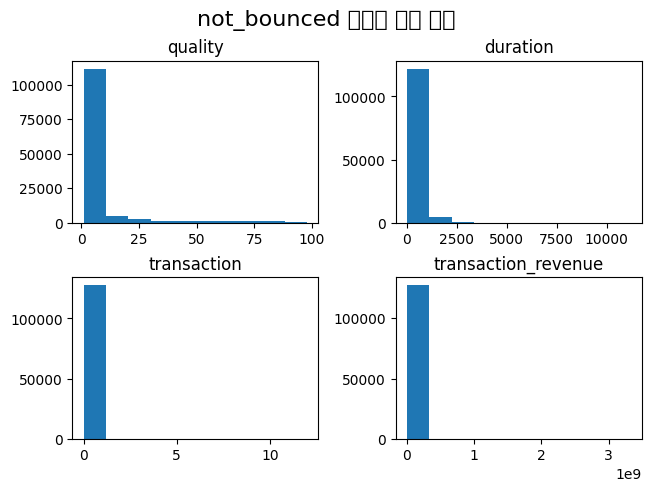

In [69]:
features = ['quality','duration','transaction','transaction_revenue']

fig, axs = plt.subplots(2,2,constrained_layout=True)
fig.suptitle('not_bounced 수치형 변수 분포', fontsize=16)
for i, feature in enumerate(features):
  axs[i//2][i%2].hist(not_bounced_train[feature]),
  axs[i//2][i%2].set_title(feature, fontsize=12),
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


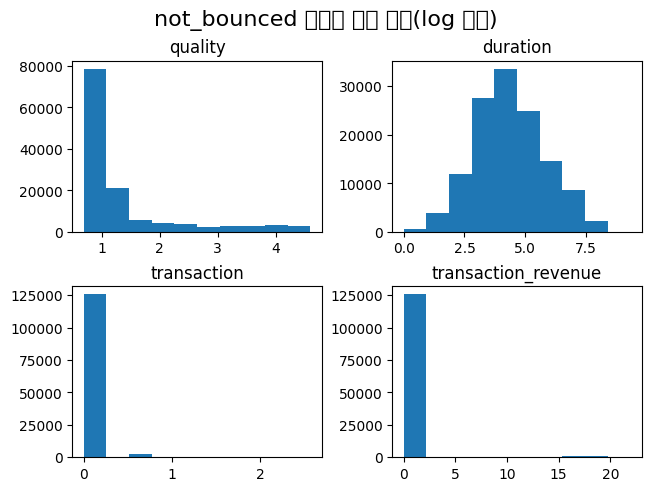

In [70]:
features = ['quality','duration','transaction','transaction_revenue']

fig, axs = plt.subplots(2,2,constrained_layout=True)
fig.suptitle('not_bounced 수치형 변수 분포(log 적용)', fontsize=16)
for i, feature in enumerate(features):
  axs[i//2][i%2].hist(np.log1p(not_bounced_train[feature])),
  axs[i//2][i%2].set_title(feature, fontsize=12),
plt.show()

In [71]:
def log_numeric_features(data):
  features = ['quality','duration','transaction','transaction_revenue']
  for feature in features:
    data['log_{}'.format(feature)]=np.log1p(data[feature])
  return data
not_bounced_train = log_numeric_features(not_bounced_train)

In [72]:
not_bounced_train['log_TARGET'] = np.log1p(not_bounced_train['TARGET'])

In [73]:
not_bounced_train.corr()

<ipython-input-73-f0a2228874ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train.corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.602723,0.526083,0.318626,0.182148,0.670768,0.543092,0.313093,0.305120,0.864698
quality,0.602723,1.000000,0.411593,0.470061,0.243841,0.897790,0.447005,0.488028,0.490762,0.606287
duration,0.526083,0.411593,1.000000,0.193630,0.115890,0.454361,0.716396,0.193399,0.188482,0.471947
transaction,0.318626,0.470061,0.193630,1.000000,0.460531,0.364977,0.183653,0.979690,0.951637,0.263947
transaction_revenue,0.182148,0.243841,0.115890,0.460531,1.000000,0.180198,0.095032,0.461651,0.487151,0.139765
log_quality,0.670768,0.897790,0.454361,0.364977,0.180198,1.000000,0.542288,0.379978,0.381912,0.740873
log_duration,0.543092,0.447005,0.716396,0.183653,0.095032,0.542288,1.000000,0.189691,0.189373,0.653944
log_transaction,0.313093,0.488028,0.193399,0.979690,0.461651,0.379978,0.189691,1.000000,0.990958,0.271173
log_transaction_revenue,0.305120,0.490762,0.188482,0.951637,0.487151,0.381912,0.189373,0.990958,1.000000,0.270483
log_TARGET,0.864698,0.606287,0.471947,0.263947,0.139765,0.740873,0.653944,0.271173,0.270483,1.000000


In [74]:
not_bounced_train[not_bounced_train['traffic_source']=='google'].corr()

<ipython-input-74-3b015fb6d445>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['traffic_source']=='google'].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.658630,0.529943,0.294559,0.151215,0.736696,0.558148,0.292819,0.288768,0.882283
quality,0.658630,1.000000,0.444158,0.425143,0.223082,0.884666,0.437550,0.430368,0.433831,0.611517
duration,0.529943,0.444158,1.000000,0.182516,0.105360,0.479598,0.714914,0.183214,0.182545,0.458338
transaction,0.294559,0.425143,0.182516,1.000000,0.418341,0.323781,0.154991,0.994512,0.978287,0.228978
transaction_revenue,0.151215,0.223082,0.105360,0.418341,1.000000,0.150279,0.072839,0.421499,0.457055,0.107033
log_quality,0.736696,0.884666,0.479598,0.323781,0.150279,1.000000,0.556419,0.328511,0.330315,0.769399
log_duration,0.558148,0.437550,0.714914,0.154991,0.072839,0.556419,1.000000,0.156854,0.157092,0.663273
log_transaction,0.292819,0.430368,0.183214,0.994512,0.421499,0.328511,0.156854,1.000000,0.993380,0.230961
log_transaction_revenue,0.288768,0.433831,0.182545,0.978287,0.457055,0.330315,0.157092,0.993380,1.000000,0.230788
log_TARGET,0.882283,0.611517,0.458338,0.228978,0.107033,0.769399,0.663273,0.230961,0.230788,1.000000


In [75]:
not_bounced_train[(not_bounced_train['integrated_traffic_source']=='google') & (not_bounced_train['traffic_source']!='google')].corr()

<ipython-input-75-19a4317bbdc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[(not_bounced_train['integrated_traffic_source']=='google') & (not_bounced_train['traffic_source']!='google')].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.434279,0.519408,0.157656,0.122343,0.531833,0.492756,0.157340,0.156479,0.856784
quality,0.434279,1.000000,0.213955,0.412575,0.298470,0.886969,0.326234,0.415714,0.417438,0.510037
duration,0.519408,0.213955,1.000000,0.041195,0.032407,0.301922,0.736073,0.041771,0.042581,0.496168
transaction,0.157656,0.412575,0.041195,1.000000,0.734977,0.308692,0.096962,0.997787,0.987154,0.181593
transaction_revenue,0.122343,0.298470,0.032407,0.734977,1.000000,0.226159,0.071229,0.732054,0.743282,0.136361
log_quality,0.531833,0.886969,0.301922,0.308692,0.226159,1.000000,0.403317,0.311228,0.312579,0.640086
log_duration,0.492756,0.326234,0.736073,0.096962,0.071229,0.403317,1.000000,0.097846,0.098486,0.620593
log_transaction,0.157340,0.415714,0.041771,0.997787,0.732054,0.311228,0.097846,1.000000,0.995316,0.182146
log_transaction_revenue,0.156479,0.417438,0.042581,0.987154,0.743282,0.312579,0.098486,0.995316,1.000000,0.181918
log_TARGET,0.856784,0.510037,0.496168,0.181593,0.136361,0.640086,0.620593,0.182146,0.181918,1.000000


In [76]:
not_bounced_train[not_bounced_train['integrated_traffic_source']=='etc'].corr()

<ipython-input-76-9184aa326208>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['integrated_traffic_source']=='etc'].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.634739,0.518309,0.171962,0.102790,0.737805,0.512694,0.169154,0.164355,0.898664
quality,0.634739,1.000000,0.369865,0.337959,0.139529,0.874729,0.353371,0.342763,0.343697,0.559225
duration,0.518309,0.369865,1.000000,0.076886,0.039593,0.443038,0.735110,0.074411,0.069741,0.450684
transaction,0.171962,0.337959,0.076886,1.000000,0.398760,0.233395,0.079630,0.996547,0.978507,0.133182
transaction_revenue,0.102790,0.139529,0.039593,0.398760,1.000000,0.099768,0.038160,0.404526,0.453325,0.069779
log_quality,0.737805,0.874729,0.443038,0.233395,0.099768,1.000000,0.474855,0.236452,0.237224,0.727345
log_duration,0.512694,0.353371,0.735110,0.079630,0.038160,0.474855,1.000000,0.079706,0.078792,0.589215
log_transaction,0.169154,0.342763,0.074411,0.996547,0.404526,0.236452,0.079706,1.000000,0.991367,0.133161
log_transaction_revenue,0.164355,0.343697,0.069741,0.978507,0.453325,0.237224,0.078792,0.991367,1.000000,0.131859
log_TARGET,0.898664,0.559225,0.450684,0.133182,0.069779,0.727345,0.589215,0.133161,0.131859,1.000000


In [77]:
for i, e in enumerate(not_bounced_train['traffic_source'].value_counts().sort_index()):
  print(sorted(list(not_bounced_train['traffic_source'].unique()))[i],e)

(direct) 35686
Partners 2479
adwords.google.com 10
amp.reddit.com 2
analytics.google.com 3669
arstechnica.com 1
ask 8
au.search.yahoo.com 1
aulagrado.esic.edu 16
away.vk.com 150
baidu 129
bing 376
blackboard.bentley.edu 1
blog.golang.org 138
bluequill.franklin.edu 6
businessinsider.com 2
ca-mg5.mail.yahoo.com 1
ca.search.yahoo.com 10
chatwork.com 2
connect.googleforwork.com 1
cse.google.com 2
cz.pinterest.com 1
de.wow.com 1
dealspotr.com 43
dfa 140
docs.google.com 11
duckduckgo.com 46
earth.google.com 1
es.search.yahoo.com 1
espanol.search.yahoo.com 2
evernote.com 4
facebook.com 147
feedly.com 1
fi.search.yahoo.com 1
fr-fr.facebook.com 1
fr.search.yahoo.com 1
getpocket.com 1
github.com 4
go.mail.ru 1
google 58057
google.be 1
google.ca 1
google.co.id 3
google.co.il 1
google.co.in 12
google.co.jp 20
google.co.nz 1
google.co.th 5
google.co.uk 8
google.co.za 4
google.com 730
google.com.au 1
google.com.bd 1
google.com.br 8
google.com.eg 6
google.com.mx 2
google.com.ng 1
google.com.pk 1
goog

In [78]:
not_bounced_train['integrated_traffic_source'].value_counts()

google      65227
(direct)    35686
youtube     21590
etc          5238
Name: integrated_traffic_source, dtype: int64

In [79]:
not_bounced_train[(not_bounced_train['integrated_traffic_source']=='google') & (not_bounced_train['traffic_source']=='')]

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,transaction,...,trimmed_keyword,trimmed_referral_path,transaction_status,integrated_traffic_source,keyword_or_referral_path,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

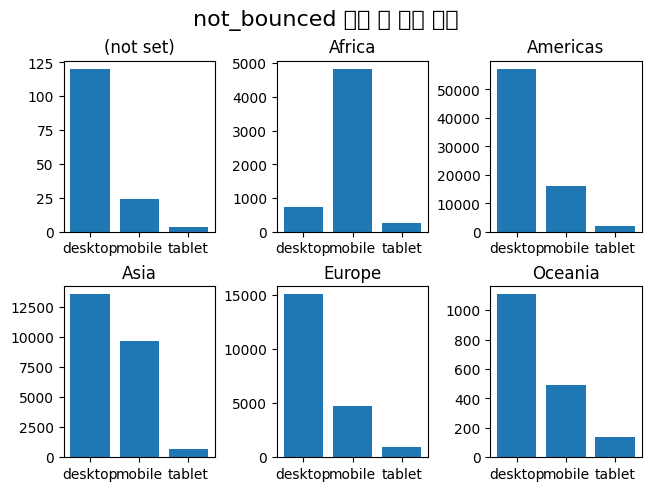

In [80]:
fig, axs = plt.subplots(2,3,constrained_layout=True)
fig.suptitle('not_bounced 대륙 별 기기 분포', fontsize=16)
for i, d in enumerate(sorted(not_bounced_train['continent'].unique())):
  axs[i//3][i%3].bar(sorted(not_bounced_train[not_bounced_train['continent']==d]['device'].unique()), not_bounced_train[not_bounced_train['continent']==d]['device'].value_counts().sort_index()),
  axs[i//3][i%3].set_title(d, fontsize=12),
plt.show()

In [81]:
not_bounced_train['continent'].value_counts()

Americas     75301
Asia         23893
Europe       20833
Africa        5832
Oceania       1734
(not set)      148
Name: continent, dtype: int64

In [82]:
not_bounced_train['subcontinent'].value_counts()

Northern America      69475
Southern Asia          9587
Western Europe         7197
Northern Europe        5877
Eastern Asia           5486
Southeast Asia         5375
Southern Europe        4135
South America          4021
Eastern Europe         3624
Western Asia           3359
Northern Africa        3144
Australasia            1716
Central America        1575
Southern Africa        1408
Western Africa          950
Eastern Africa          258
Caribbean               230
(not set)               148
Central Asia             86
Middle Africa            72
Micronesian Region       11
Melanesia                 4
Polynesia                 3
Name: subcontinent, dtype: int64

In [83]:
not_bounced_train['country'].value_counts()

United States             64846
India                      8539
Canada                     4626
United Kingdom             3729
Egypt                      2628
                          ...  
Guernsey                      1
Chad                          1
Bhutan                        1
British Virgin Islands        1
Botswana                      1
Name: country, Length: 196, dtype: int64

In [84]:
not_bounced_train[not_bounced_train['country']=='United States'].describe()

,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
count,64846.000000,64846.000000,64846.000000,64846.000000,6.484600e+04,64846.000000,64846.000000,64846.000000,64846.000000,64846.000000
mean,6.846853,10.720260,217.651775,0.033618,3.428688e+06,1.588962,4.336991,0.022926,0.580559,1.826083
std,7.208613,19.651316,409.179711,0.192812,4.168365e+07,1.157321,1.470374,0.125850,3.171356,0.629454
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.693147,0.000000,0.000000,0.000000,0.693147
25%,3.000000,1.000000,26.000000,0.000000,0.000000e+00,0.693147,3.295837,0.000000,0.000000,1.386294
50%,5.000000,2.000000,72.000000,0.000000,0.000000e+00,1.098612,4.290459,0.000000,0.000000,1.791759
75%,8.000000,8.000000,204.000000,0.000000,0.000000e+00,2.197225,5.323010,0.000000,0.000000,2.197225
max,386.000000,98.000000,6595.000000,12.000000,3.325712e+09,4.595120,8.794219,2.564949,21.924950,5.958425


In [85]:
not_bounced_train[not_bounced_train['country']=='India'].describe()

,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
count,8539.000000,8539.000000,8539.000000,8539.000000,8.539000e+03,8539.000000,8539.000000,8539.000000,8539.000000,8539.000000
mean,4.732756,1.474997,195.350744,0.000117,2.407814e+03,0.799913,4.395896,0.000081,0.001972,1.547711
std,5.160531,2.163482,381.670270,0.010822,2.224981e+05,0.349927,1.262373,0.007501,0.182226,0.554458
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.693147,0.000000,0.000000,0.000000,0.693147
25%,2.000000,1.000000,33.000000,0.000000,0.000000e+00,0.693147,3.526361,0.000000,0.000000,1.098612
50%,3.000000,1.000000,68.000000,0.000000,0.000000e+00,0.693147,4.234107,0.000000,0.000000,1.386294
75%,5.000000,1.000000,177.500000,0.000000,0.000000e+00,0.693147,5.184585,0.000000,0.000000,1.791759
max,85.000000,60.000000,6369.000000,1.000000,2.056032e+07,4.110874,8.759355,0.693147,16.838874,4.454347


In [86]:
not_bounced_train[not_bounced_train['country']=='Canada'].describe()

,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
count,4626.000000,4626.000000,4626.000000,4626.000000,4.626000e+03,4626.000000,4626.000000,4626.000000,4626.000000,4626.000000
mean,6.750973,7.641591,255.984220,0.009511,4.711001e+05,1.423610,4.410473,0.006531,0.153891,1.810693
std,7.067782,14.530488,520.322319,0.099275,7.167902e+06,1.027237,1.537837,0.067686,1.629770,0.633438
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.693147,0.000000,0.000000,0.000000,0.693147
25%,3.000000,1.000000,27.250000,0.000000,0.000000e+00,0.693147,3.340977,0.000000,0.000000,1.386294
50%,4.000000,2.000000,77.000000,0.000000,0.000000e+00,1.098612,4.356709,0.000000,0.000000,1.609438
75%,8.000000,5.000000,228.000000,0.000000,0.000000e+00,1.791759,5.433722,0.000000,0.000000,2.197225
max,102.000000,92.000000,9826.000000,2.000000,2.576742e+08,4.532599,9.192889,1.098612,19.367207,4.634729


In [87]:
not_bounced_train[not_bounced_train['continent']=='Asia']['subcontinent'].value_counts()

Southern Asia     9587
Eastern Asia      5486
Southeast Asia    5375
Western Asia      3359
Central Asia        86
Name: subcontinent, dtype: int64

In [88]:
not_bounced_train[not_bounced_train['subcontinent']=='Southern Asia'].corr()

<ipython-input-88-9fc5478e83b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['subcontinent']=='Southern Asia'].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.631798,0.504115,0.118988,0.130122,0.743125,0.505953,0.118988,0.119751,0.883184
quality,0.631798,1.000000,0.494203,0.213155,0.213449,0.909215,0.375538,0.213155,0.213312,0.538190
duration,0.504115,0.494203,1.000000,0.110272,0.116641,0.530247,0.726705,0.110272,0.110729,0.449283
transaction,0.118988,0.213155,0.110272,1.000000,0.988130,0.128417,0.046222,1.000000,0.999954,0.061203
transaction_revenue,0.130122,0.213449,0.116641,0.988130,1.000000,0.127470,0.046541,0.988130,0.989553,0.064162
log_quality,0.743125,0.909215,0.530247,0.128417,0.127470,1.000000,0.474989,0.128417,0.128446,0.687219
log_duration,0.505953,0.375538,0.726705,0.046222,0.046541,0.474989,1.000000,0.046222,0.046273,0.586754
log_transaction,0.118988,0.213155,0.110272,1.000000,0.988130,0.128417,0.046222,1.000000,0.999954,0.061203
log_transaction_revenue,0.119751,0.213312,0.110729,0.999954,0.989553,0.128446,0.046273,0.999954,1.000000,0.061429
log_TARGET,0.883184,0.538190,0.449283,0.061203,0.064162,0.687219,0.586754,0.061203,0.061429,1.000000


In [89]:
not_bounced_train[not_bounced_train['subcontinent']=='Eastern Asia'].corr()

<ipython-input-89-b12e1a2c4849>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['subcontinent']=='Eastern Asia'].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.680430,0.539973,0.097611,0.121706,0.770697,0.541698,0.097611,0.100814,0.893092
quality,0.680430,1.000000,0.473980,0.160719,0.130565,0.914826,0.433896,0.160719,0.160673,0.609507
duration,0.539973,0.473980,1.000000,0.079653,0.104217,0.520526,0.723447,0.079653,0.082527,0.462136
transaction,0.097611,0.160719,0.079653,1.000000,0.815563,0.116744,0.047961,1.000000,0.999005,0.063999
transaction_revenue,0.121706,0.130565,0.104217,0.815563,1.000000,0.095923,0.047100,0.815563,0.840070,0.066148
log_quality,0.770697,0.914826,0.520526,0.116744,0.095923,1.000000,0.543700,0.116744,0.116736,0.754694
log_duration,0.541698,0.433896,0.723447,0.047961,0.047100,0.543700,1.000000,0.047961,0.048506,0.638584
log_transaction,0.097611,0.160719,0.079653,1.000000,0.815563,0.116744,0.047961,1.000000,0.999005,0.063999
log_transaction_revenue,0.100814,0.160673,0.082527,0.999005,0.840070,0.116736,0.048506,0.999005,1.000000,0.065062
log_TARGET,0.893092,0.609507,0.462136,0.063999,0.066148,0.754694,0.638584,0.063999,0.065062,1.000000


In [90]:
not_bounced_train[not_bounced_train['subcontinent']=='Southeast Asia'].corr()

<ipython-input-90-5da0c3d79e85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[not_bounced_train['subcontinent']=='Southeast Asia'].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.514379,0.527744,0.108639,0.101337,0.649285,0.462025,0.108639,0.108394,0.823402
quality,0.514379,1.000000,0.443812,0.336549,0.304564,0.885772,0.376488,0.336549,0.336699,0.519025
duration,0.527744,0.443812,1.000000,0.084043,0.081635,0.524866,0.722627,0.084043,0.084191,0.464838
transaction,0.108639,0.336549,0.084043,1.000000,0.919674,0.221967,0.074758,1.000000,0.999574,0.101094
transaction_revenue,0.101337,0.304564,0.081635,0.919674,1.000000,0.202959,0.069251,0.919674,0.930545,0.093249
log_quality,0.649285,0.885772,0.524866,0.221967,0.202959,1.000000,0.505152,0.221967,0.221954,0.698020
log_duration,0.462025,0.376488,0.722627,0.074758,0.069251,0.505152,1.000000,0.074758,0.074716,0.598635
log_transaction,0.108639,0.336549,0.084043,1.000000,0.919674,0.221967,0.074758,1.000000,0.999574,0.101094
log_transaction_revenue,0.108394,0.336699,0.084191,0.999574,0.930545,0.221954,0.074716,0.999574,1.000000,0.100923
log_TARGET,0.823402,0.519025,0.464838,0.101094,0.093249,0.698020,0.598635,0.101094,0.100923,1.000000


In [91]:
not_bounced_train[(not_bounced_train['browser']=='Chrome') & (not_bounced_train['device']=='desktop') & (not_bounced_train['OS']=='Windows') & (not_bounced_train['new']=='not_visited') & (not_bounced_train['continent']=='Asia')].corr()

<ipython-input-91-934362bd2f63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[(not_bounced_train['browser']=='Chrome') & (not_bounced_train['device']=='desktop') & (not_bounced_train['OS']=='Windows') & (not_bounced_train['new']=='not_visited') & (not_bounced_train['continent']=='Asia')].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.793489,0.488381,0.240898,0.251181,0.838993,0.473188,0.240898,0.241550,0.913648
quality,0.793489,1.000000,0.459233,0.224169,0.225056,0.929038,0.414254,0.224169,0.224266,0.700707
duration,0.488381,0.459233,1.000000,0.124374,0.131807,0.466683,0.739593,0.124374,0.124835,0.441453
transaction,0.240898,0.224169,0.124374,1.000000,0.996409,0.138287,0.060200,1.000000,0.999988,0.114110
transaction_revenue,0.251181,0.225056,0.131807,0.996409,1.000000,0.138166,0.061322,0.996409,0.996817,0.116022
log_quality,0.838993,0.929038,0.466683,0.138287,0.138166,1.000000,0.486438,0.138287,0.138307,0.818965
log_duration,0.473188,0.414254,0.739593,0.060200,0.061322,0.486438,1.000000,0.060200,0.060277,0.537059
log_transaction,0.240898,0.224169,0.124374,1.000000,0.996409,0.138287,0.060200,1.000000,0.999988,0.114110
log_transaction_revenue,0.241550,0.224266,0.124835,0.999988,0.996817,0.138307,0.060277,0.999988,1.000000,0.114245
log_TARGET,0.913648,0.700707,0.441453,0.114110,0.116022,0.818965,0.537059,0.114110,0.114245,1.000000


In [92]:
not_bounced_train[(not_bounced_train['browser']=='Chrome') & (not_bounced_train['device']=='desktop') & (not_bounced_train['OS']=='Windows') & (not_bounced_train['new']=='not_visited') & (not_bounced_train['continent']=='Americas')].corr()

<ipython-input-92-917ca6a0be50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[(not_bounced_train['browser']=='Chrome') & (not_bounced_train['device']=='desktop') & (not_bounced_train['OS']=='Windows') & (not_bounced_train['new']=='not_visited') & (not_bounced_train['continent']=='Americas')].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.763655,0.528116,0.369122,0.243864,0.742726,0.569680,0.370333,0.358409,0.897129
quality,0.763655,1.000000,0.458379,0.498867,0.263691,0.919765,0.568704,0.500449,0.493030,0.784489
duration,0.528116,0.458379,1.000000,0.184356,0.121123,0.458999,0.721691,0.184148,0.166343,0.488571
transaction,0.369122,0.498867,0.184356,1.000000,0.518098,0.405228,0.247243,0.999071,0.979145,0.358715
transaction_revenue,0.243864,0.263691,0.121123,0.518098,1.000000,0.211699,0.139735,0.517016,0.563722,0.211537
log_quality,0.742726,0.919765,0.458999,0.405228,0.211699,1.000000,0.633458,0.406590,0.400455,0.844331
log_duration,0.569680,0.568704,0.721691,0.247243,0.139735,0.633458,1.000000,0.247711,0.239993,0.679379
log_transaction,0.370333,0.500449,0.184148,0.999071,0.517016,0.406590,0.247711,1.000000,0.982327,0.359789
log_transaction_revenue,0.358409,0.493030,0.166343,0.979145,0.563722,0.400455,0.239993,0.982327,1.000000,0.352319
log_TARGET,0.897129,0.784489,0.488571,0.358715,0.211537,0.844331,0.679379,0.359789,0.352319,1.000000


In [93]:
not_bounced_train[(not_bounced_train['browser']=='Chrome') & (not_bounced_train['device']=='desktop') & (not_bounced_train['OS']=='Windows') & (not_bounced_train['new']=='not_visited') & (not_bounced_train['continent']=='Europe')].corr()

<ipython-input-93-f0a87dcb6fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_bounced_train[(not_bounced_train['browser']=='Chrome') & (not_bounced_train['device']=='desktop') & (not_bounced_train['OS']=='Windows') & (not_bounced_train['new']=='not_visited') & (not_bounced_train['continent']=='Europe')].corr()


,TARGET,quality,duration,transaction,transaction_revenue,log_quality,log_duration,log_transaction,log_transaction_revenue,log_TARGET
TARGET,1.000000,0.607152,0.577076,0.016277,0.016516,0.644305,0.409447,0.016277,0.016291,0.755654
quality,0.607152,1.000000,0.514316,0.067904,0.066743,0.927877,0.452558,0.067904,0.067843,0.718653
duration,0.577076,0.514316,1.000000,-0.000196,0.000141,0.549629,0.717061,-0.000196,-0.000177,0.556024
transaction,0.016277,0.067904,-0.000196,1.000000,0.998615,0.080355,0.023671,1.000000,0.999995,0.040035
transaction_revenue,0.016516,0.066743,0.000141,0.998615,1.000000,0.079660,0.023979,0.998615,0.998768,0.040300
log_quality,0.644305,0.927877,0.549629,0.080355,0.079660,1.000000,0.542383,0.080355,0.080322,0.838047
log_duration,0.409447,0.452558,0.717061,0.023671,0.023979,0.542383,1.000000,0.023671,0.023690,0.591990
log_transaction,0.016277,0.067904,-0.000196,1.000000,0.998615,0.080355,0.023671,1.000000,0.999995,0.040035
log_transaction_revenue,0.016291,0.067843,-0.000177,0.999995,0.998768,0.080322,0.023690,0.999995,1.000000,0.040053
log_TARGET,0.755654,0.718653,0.556024,0.040035,0.040300,0.838047,0.591990,0.040035,0.040053,1.000000
